In [69]:
import yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data = yfinance.download('^BVSP', period='20y', interval='1d')['Close']

data

[*********************100%***********************]  1 of 1 completed


Ticker,^BVSP
Date,
2005-02-25,28425.0
2005-02-28,28139.0
2005-03-01,27730.0
2005-03-02,28200.0
2005-03-03,28668.0
...,...
2025-02-19,127309.0
2025-02-20,127601.0
2025-02-21,127128.0


In [71]:
data['SMA_200'] = data.rolling(window=200).mean()
data['SMA_DIFF'] = np.divide(data['^BVSP'], data['SMA_200']) -1

data

Ticker,^BVSP,SMA_200,SMA_DIFF
Date,,,
2005-02-25,28425.0,NaN,NaN
2005-02-28,28139.0,NaN,NaN
2005-03-01,27730.0,NaN,NaN
2005-03-02,28200.0,NaN,NaN
2005-03-03,28668.0,NaN,NaN
...,...,...,...
2025-02-19,127309.0,127448.135,-0.001092
2025-02-20,127601.0,127440.090,0.001263
2025-02-21,127128.0,127428.325,-0.002357


In [72]:
valid_diff = data['SMA_DIFF'].dropna()

max_diff = valid_diff.max()
min_diff = valid_diff.min()

r_range = max(abs(max_diff), abs(min_diff))

print(r_range, max_diff, min_diff)

0.5015810219121475 0.36394686329647374 -0.5015810219121475


In [73]:
raw_score = 50 + 50 * (data['SMA_DIFF'] / r_range)
score = np.clip(raw_score, 0, 100)

score

Date
2005-02-25          NaN
2005-02-28          NaN
2005-03-01          NaN
2005-03-02          NaN
2005-03-03          NaN
                ...    
2025-02-19    49.891174
2025-02-20    50.125865
2025-02-21    49.765061
2025-02-24    48.424790
2025-02-25    48.884047
Name: SMA_DIFF, Length: 4953, dtype: float64

In [74]:
data['FG_SCORE'] = score

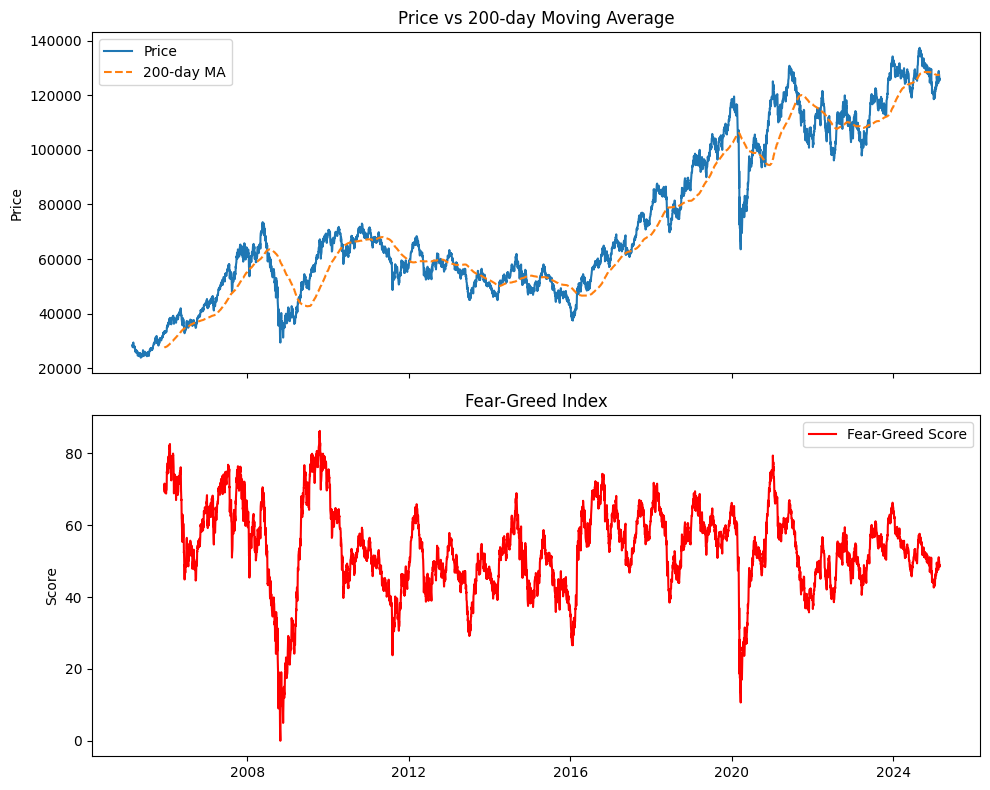

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(data.index, data["^BVSP"], label="Price")
ax[0].plot(data.index, data["SMA_200"], label="200-day MA", linestyle="--")
ax[0].set_ylabel("Price")
ax[0].legend()
ax[0].set_title("Price vs 200-day Moving Average")

ax[1].plot(data.index, data["FG_SCORE"], label="Fear-Greed Score", color="red")
ax[1].set_ylabel("Score")
ax[1].set_title("Fear-Greed Index")
ax[1].legend()

plt.tight_layout()
plt.show()